In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 분류, 군집

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

그림 저장: classification_vs_clustering_plot


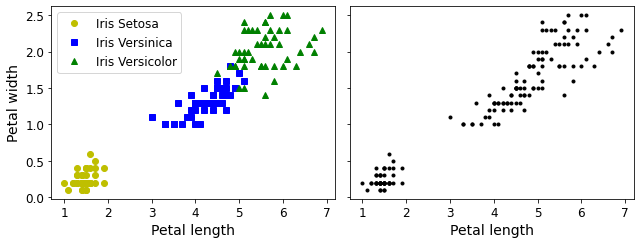

In [4]:
plt.figure(figsize = (9,3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0,3],'yo', label = 'Iris Setosa')
plt.plot(X[y==1, 2], X[y==1,3],'bs', label = 'Iris Versinica')
plt.plot(X[y==2, 2], X[y==2,3],'g^', label = 'Iris Versicolor')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c='k', marker = '.')
plt.xlabel('Petal length', fontsize = 14)
plt.tick_params(labelleft = False)

save_fig('classification_vs_clustering_plot')
plt.show()

- 왼쪽의 그래프는 레이블이 있음(setosa, versinica, versicolor)
 - 레이블이 있으면 지도학습 가능(분류)
- 오른쪽의 그래프는 레이블에 대한 정보를 알 수 없음 
 - 지도학습이 불가능 즉, 비지도 학습

#### 가우시안 혼합 모델을 통해 3개의 클러스터를 잘 나눌 수 있음
- 이 때, 꽃잎 길이와 너비, 꽃받침 길이와 너비 4개의 특성을 모두 사용

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(X).predict(X)
mapping_index = [np.argmax(np.bincount(y_pred[n:n+50])) for n in range(0,150,50)]
mapping = {mapping_index[i]:i for i in [0,1,2]}
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

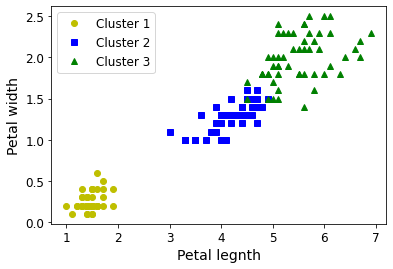

In [7]:
plt.plot(X[y_pred ==0, 2], X[y_pred == 0 , 3], 'yo', label = 'Cluster 1')
plt.plot(X[y_pred ==1, 2], X[y_pred == 1 , 3], 'bs', label = 'Cluster 2')
plt.plot(X[y_pred ==2, 2], X[y_pred == 2 , 3], 'g^', label = 'Cluster 3')
plt.xlabel('Petal legnth', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

- 약간의 오차는 존재하지만 오른쪽의 두 cluster들이 잘 구분되었다고 볼 수 있음

In [8]:
np.sum(y_pred == y) # 145개의 샘플에 대해서 제대로 clustering이 되었음

145

In [9]:
np.sum(y_pred == y)/ len(y_pred) # 96.7%의 정확성을 갖고있음

0.9666666666666667

# K-평균
- 가장 대표적인 클러스터링 알고리즘 중 하나

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
[[0.2, 2.3],
 [-1.5, 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 7)

In [17]:
def plot_clusters(X, y = None) :
    plt.scatter(X[:,0], X[:,1], c = y, s = 1)
    plt.xlabel("$x_1$", fontsize = 14)
    plt.ylabel("$x_2$", fontsize = 14, rotation = 0)

- 5개의 클러스터 생성

그림 저장: blobs_plot


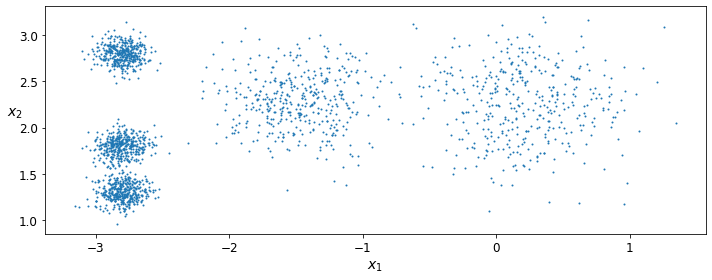

In [18]:
plt.figure(figsize = (10,4))
plot_clusters(X)
save_fig('blobs_plot')
plt.show()

### 훈련과 예측
- K\-평균 군집 알고리즘 훈련
- 이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당

In [19]:
from sklearn.cluster import KMeans

In [21]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [23]:
y_pred # 각 샘플이 5개의 클러스터 중 하나에 할당됨

array([0, 4, 1, ..., 2, 1, 4])

In [24]:
y_pred is kmeans.labels_ # 예측값이 kmeans.labels와 동일

True

#### 5개의 센트로이드(클러스터 중심)을 찾았음

In [26]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

- KMeans 객체는 훈련한 샘플의 레이블을 가지고 있음
- 여기서 샘플의 레이블은 샘플에 할당한 클러스터의 인덱스

In [27]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

### 새로운 샘플의 레이블을 예측할 수 있음
- 가장 가까운 센트로이드를 찾아서 그 센트로이드의 인덱스 반환

In [29]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

# 결정 경계
- 평면을 가장 가까운 점의 집합으로 분할

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: voronoi_plot


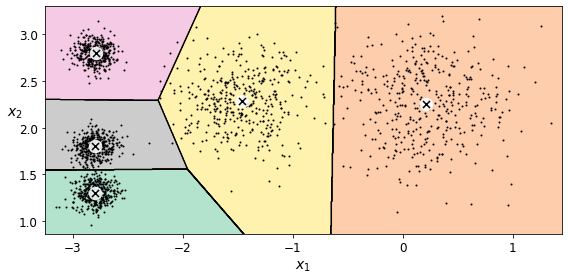

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

- 일부 샘플은 잘못 클러스터링 된 것처럼 보이긴 하지만 전반적으로 아주 잘 클러스터링 되었음

### 하드 군집 vs 소프트 군집
- 하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택
- 이 대신 샘플에서 5개의 센트로이드까지 거리를 측정하는 것이 나을 수 있음
- transform() 메서드에서 이 거리를 계산

In [32]:
kmeans.transform(X_new) # 4개의 샘플에 대해 5개의 센트로이드까지의 거리

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

- 이 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인할 수 있음

In [34]:
np.linalg.norm(np.tile(X_new, (1,k)).reshape(-1,k,2) - kmeans.cluster_centers_, axis = 2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

- 두 값이 동일하다
 - 즉,  transform() 메서드는 유클리드 거리를 이용

# K\-평균 알고리즘

- k\-평균 알고리즘은 가장 빠른 군집이면서 가장 간단한 알고리즘 중 하나임
 - 먼저 $k$개의 센트로이드를 랜덤하게 초기화:데이터셋에서 $k$개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓음
 - 수렴할 때까지 다음을 반복(센트로이드가 더이상 이동하지 않을 때까지)
   - 각 샘플을 가장 가까운 센트로이드에 할당
   - 센트로이드에 할당된 샘플의 평균으로 센트로이드 업데이트

- K\-평균 알고리즘을 1,2,3회 반복하고 센트로이드가 어떻게 움직이는지 관찰

In [36]:
kmeans_iter1 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 1, random_state = 9)
kmeans_iter2 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 2, random_state = 9)
kmeans_iter3 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 3, random_state = 9)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=9)

- 그래프

그림 저장: kmeans_algorithm_plot


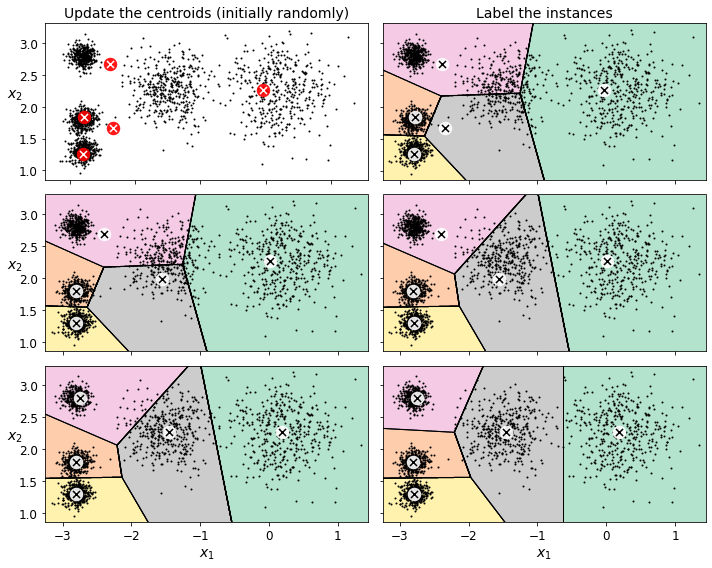

In [37]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

### K-평균의 변동성

- 원래 K\-평균 알고리즘에서는 센트로이드가 랜덤하게 초기화되고 알고리즘은 단순히 한 번씩 반복하여 센트로이드를 개선
- 이 방식의 문제점은 K\-평균을 여러 번(또는 다른 랜덤 시드로) 실행하면 매우 다른 결과를 얻게 됨

In [38]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

그림 저장: kmeans_variability_plot


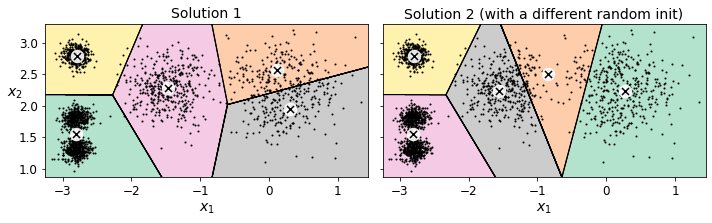

In [39]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

# 이너셔
- 최선의 모델을 선택하기 위해서는 K\-평균 모델의 성능을 평가할 방법이 있어야 함
- 하지만 군집은 비지도 학습이기 때문에 타깃이 없음

#### 하지만 적어도 각 샘플과 센트로이드 사이의 거리는 측정할 수 있는데, 이것이 이니셔 지표의 아이디어

In [42]:
kmeans.inertia_

211.5985372581683

- 이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증할 수 있음

In [43]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

#### score() 메서드는 음의 이너셔 반환
- 음의 이너셔 반환하는 이유는 이너셔는 작을수록 좋지만 사이킷런의 score() 메서드는 항상 **클수록 좋은 것**이라는 규칙을 따라야 하기 때문

In [44]:
kmeans.score(X)

-211.5985372581683

# 다중 초기화

- 변동성 이슈를 해결하는 한 가지 방법은 단순히 K\-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을 선택하는 것
- 예를 들어, 앞의 모델들의 두 개의 이너셔는 다음과 같다

In [45]:
kmeans_rnd_init1.inertia_

219.50265127189653

In [46]:
kmeans_rnd_init2.inertia_

236.63519259650332

- 앞에서 훈련한 **좋은** 모델보다 이너셔값이 높음
- 즉, 더 나쁜 모델

n_init 매개변수를 지정하면 사이킷런은 원래 알고리즘을 n_init번 실행하고 이너셔가 가장 작은 솔루션을 선택
- 이 매개변수의 기본값은 n_init = 10

In [47]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = 'random', n_init = 10,
                             algorithm = 'full', random_state = 11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

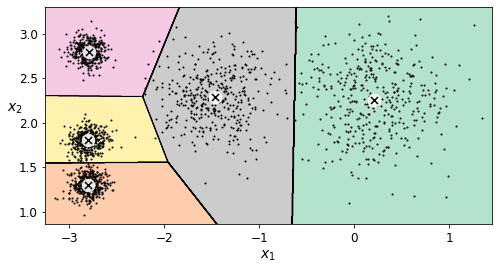

In [48]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

처음에 만들었던 모델이 얻어졌음

즉, 이 모델이 최적의 K\-평균 결과로 보임

# K\-평균++

센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가 [2006년 논문](https://goo.gl/eNUPw6)에서 제안한 다음 알고리즘을 사용해 초기화하는 것이 더 좋음
* 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택
* $D^2(\mathbf{x}_i)$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택
 * 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리
 * 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높임
* $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복

K-평균++ 알고리즘의 나머지는 일반 K-평균과 같다

이 초기화 방식을 사용하면 K-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 훨씬 높아짐

따라서 n_init 값을 상당히 줄일 수 있음

대부분의 경우 n_init를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상

#### K\-평균++ 초기화를 사용하려면 간단하게 init = 'k-means++'로 지정(이 값이 기본값임)

In [51]:
KMeans()

KMeans()

In [53]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822365

# K\-평균 속도 개선
- K\-평균 알고리즘은 불필요한 거리 계산을 많이 피하는 식으로 속도를 크게 높일 수 있음
- 이를 위해 **삼각 부등식**을 이용
 - 3개의 점 A,B,C에 대해 거리 AC는 항상 AC ≤ AB + BC 만족
- 그리고 샘플과 센트로이드 사이 거리의 최솟값과 최댓값 유지

Elkan의 K\-평균 방식을 사용하려면 algorithm = 'elkan'

이 방법은 희소 행렬을 지원하지 않음
- 따라서 사이킷런은 밀집 배열에는 elkan 사용하고 희소 행렬에는 기본 알고리즘인 full 사용

In [54]:
%timeit -n 50 KMeans(algorithm = 'elkan').fit(X)

175 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [55]:
%timeit -n 50 KMeans(algorithm = 'full').fit(X)

355 ms ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


# 미니배치 K-평균

In [56]:
from sklearn.cluster import MiniBatchKMeans

In [57]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [58]:
minibatch_kmeans.inertia_

211.93186531476786

#### 데이터셋이 메모리에 다 들어가지 못한다면 가장 간단한 방법은 점진적 PCA처럼 memmap 클래스 사용

In [60]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist['data'], mnist['target'], random_state = 42)

- memmap에 데이터 기록

In [80]:
filename = 'my_mnist.data'

X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape = X_train.shape)
X_mm[:] = X_train

OSError: [Errno 22] Invalid argument: 'my_mnist.data'

In [81]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

NameError: name 'X_mm' is not defined

- 데이터가 너무 커서 memmap을 사용할 수 없는 경우

In [82]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- 한 번에 하나의 배치를 모델에 주입하여 훈련 가능
- 또한 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델 선택

In [83]:
np.random.seed(42)

In [84]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [85]:
best_kmeans.score(X)

-211.70999744411446

In [86]:
%timeit KMeans(n_clusters=5).fit(X)

102 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

55.8 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


훨씬 빠른 것을 알 수 있음

하지만 성능이 낮은(즉, 이너셔가 낮은) 경우가 많음
- 특히 k가 증가할수록 더 그런 현상이 잘 나타남


- 미니배치 K\-평균과 일반 K\-평균의 이너셔와 훈련 시간 그래프로 표시

In [89]:
from timeit import timeit

In [ ]:
times = np.empty((100,2))
inertias = np.empty((100,2))
for k in range(1,101) :
    kmeans_ = KMeans(n_clusters = k, random_state = 42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters = k, random_state = 42)
    print("\r{}/{}".format(k,100), end = "")
    times[k-1,0] = timeit('kmeans_.fit(X)', number = 10, globals = globals())
    times[k-1,1] = timeit('minibatch_kmeans.fit(X)', number = 10, globals = globals())
    inertias[k-1,0] = kmeans_.inertia_
    inertias[k-1,1] = minibatch_kmeans.inertia_

56/100

In [ ]:
plt.figure(figsize = (10,4))

plt.subplot(121)
plt.plot(range(1,101), inertias[:,0], 'r--', label = 'K-Means')
plt.plot(range(1,101), inertias[:,1], 'b.-', label = 'Mini-batch K-Means')
plt.xlabel('$k$', fontsize = 16)
plt.ylabel('Inertia', fontsize = 14)
plt.legend(fontsize = 14)
plt.axis([1,100,0,6])

plt.plot(range(1,101), times[:,0], 'r--', label = 'K-Means')
plt.plot(range(1,101), times[:,1], 'b.-', label = 'Mini-batch K-Means')
plt.xlabel('$k$', fontsize = 16)
plt.ylabel('Training time(seconds)', fontsize = 14)
plt.legend(fontsize = 14)
plt.axis([1,100,0,6])

save_fig('minibatch_kmeans_vs_kmeans')
plt.show()

- 상대적으로 미니배치 K\-평균법의 이너셔 값이 더 높음
- 반면에 미니배치 K\-평균법의 훈련 시간이 훨씬 짧은 장점이 있음